In [2]:
using Graphs
using SimpleWeightedGraphs
using GraphPlot
using PyPlot

In [36]:
function c2i(cor, shape)
    i, j = cor
    i -= 1
    j -= 1
    n1, n2 = shape
    idx = j * n1 + i
    return idx + 1
end


function i2c(idx, shape)
    n1, n2 = shape
    idx -= 1
    j = div(idx, n1)
    i = idx % n1
    return i + 1, j + 1
end

# function rand_grid(t, l, p, periodic)
#     shape = t, l
#     n = t * l
#     g = SimpleWeightedGraph(n)
#     for i in 1:t
#         for j in 1:(periodic ? l : l-1)
#             if rand() < p
#                 add_edge!(g, c2i((i, j), shape), c2i((i, j%l+1), shape), 1)
#             else
#                 add_edge!(g, c2i((i, j), shape), c2i((i, j%l+1), shape), 0)
#             end
#             if i != t
#                 if rand() < p
#                     add_edge!(g, c2i((i, j), shape), c2i((i%t+1, j), shape), 1)
#                 else
#                     add_edge!(g, c2i((i, j), shape), c2i((i%t+1, j), shape), 0)
#                 end
#             end
#         end
#     end
#     return g
# end


function rand_cont_grid(t, l, sampler, periodic)
    shape = t, l
    n = t * l
    g = SimpleWeightedGraph(n)
    for i in 1:t
        for j in 1:(periodic ? l : l-1)
            add_edge!(g, c2i((i, j), shape), c2i((i, j%l+1), shape), sampler())
            if i != t
                add_edge!(g, c2i((i, j), shape), c2i((i%t+1, j), shape), sampler())
            end
        end
    end
    return g
end


function dw_f_sim(l, n_step, step_size, n_average, periodic)
    result = zeros(n_step, l)
    for _ in 1:n_average
        for i in 1:n_step
            t = (i - 1) * step_size + 1
            shape = t, l
            source = 1, div(l, 2)
            targets = 1, 1:l
            
            
            g = rand_cont_grid(t, l, rand, periodic)
            tmp = dijkstra_shortest_paths(g, c2i(source, shape))
            result[i, :] += reshape(tmp.dists, t, l)[targets...]
        end
    end
    result ./= n_average
    return result
end

function dw_g_sim(l, n_step, step_size, n_average, periodic)
    result = zeros(n_step, l)
    for _ in 1:n_average
        for i in 1:n_step
            t = (i - 1) * step_size + 1
            shape = t, l
            source = 1, div(l, 2)
            targets = t, 1:l
            
            
            g = rand_cont_grid(t, l, rand, periodic)
            tmp = dijkstra_shortest_paths(g, c2i(source, shape))
            result[i, :] += reshape(tmp.dists, t, l)[targets...]
        end
    end
    result ./= n_average
    return result
end

function dw_h_sim(l, n_step, step_size, n_average, periodic)
    result = zeros(n_step)
    for _ in 1:n_average
        for i in 1:n_step
            t = (i - 1) * step_size + 1
            shape = t, l
            source = 1, div(l, 2)
            targets = t, 1:l
            
            g = rand_cont_grid(t, l, rand, periodic)
            tmp = [
                begin
                    tmp = dijkstra_shortest_paths(g, c2i((j, 1), shape))
                    reshape(tmp.dists, t, l)[j, l]
                end
                    for j in 1:t]
                
            result[i] += minimum(tmp)
        end
    end
    result ./= n_average
    return result
end

dw_h_sim (generic function with 1 method)

In [120]:
shape = 50, 100

sampler() = rand()
t, l = shape
periodic = false

g = rand_cont_grid(t, l, sampler, periodic);

In [95]:
tmp = dijkstra_shortest_paths(g, c2i((1, 50), shape));

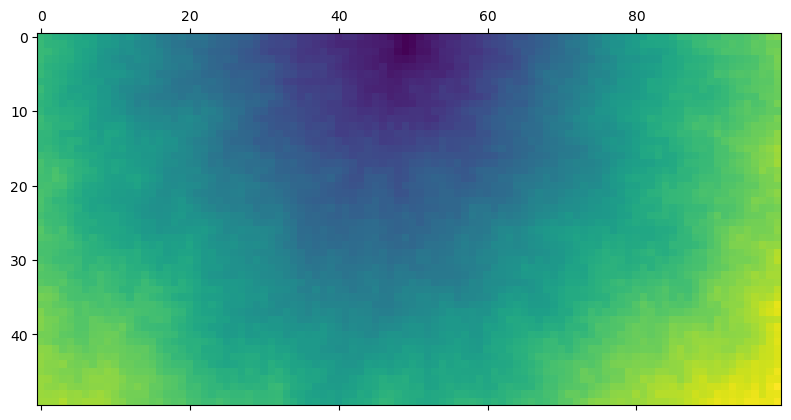

PyObject <matplotlib.image.AxesImage object at 0x000000004537B2B0>

In [96]:
matshow(reshape(tmp.dists, t,l))

In [60]:
l = 128
periodic = true
n_step = 20
step_size = 1
n_average = 

f = dw_f_sim(2l, n_step, step_size, n_average, periodic)[:, l+1:end]
g = dw_g_sim(2l, n_step, step_size, n_average, periodic)[:, l+1:end]
h = dw_h_sim(l, n_step, step_size, n_average, false);

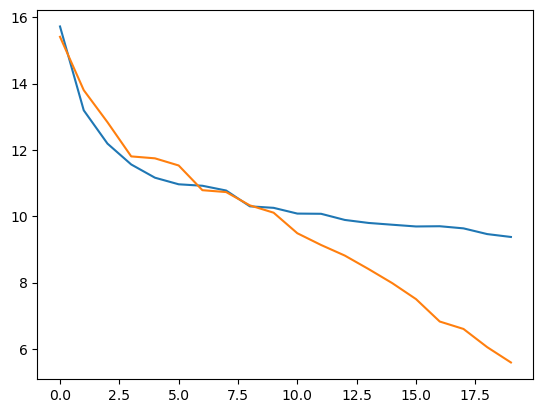

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000001E12E80>

In [62]:
r = 1/4
L=l
I_A_BC = f[:, Int(r*L)] + h - f[:, Int((1-r)*L)]
I_A_C = f[:, Int(r*L)] + f[:, Int((1-r)*L)] - 2g[:, Int((1/2-r)*L)]

# plot(f[1, :], "-o")
# plot(g[1,:], "-o")
# plot(h)


plot(I_A_BC)
plot(I_A_C)

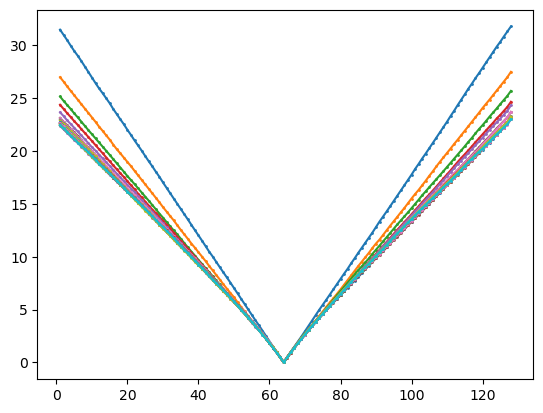

In [30]:
for i in 1:n_step
    t = (i-1)*step_size
    x = 1:l
    y = f[i, :]
    plot(x,y,"-o",ms=1)
#     y = g[i, :]
#     plot(x,y)
end